In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [56]:
df = pd.read_csv('./data_iklim.csv')
print(df.head())

      TANGGAL    TN    TX  TAVG RH_AVG   RR   SS  FF_X  DDD_X  FF_AVG DDD_CAR
0  01-01-2023    20  26.8  22.6     83  5.2  0.2     4    220       1      W 
1  02-01-2023  19.4  28.8  23.8     75    0  3.3     4    180       2      W 
2  03-01-2023  21.4  27.6  23.5     77    0  6.1     3     20       2      SW
3  04-01-2023    21  28.8  23.5     76    -  4.8     6    300       2      SW
4  05-01-2023  20.6  29.4  23.7     79  0.2  5.0     5    260       2      S 


Check for missing data before convert

In [57]:
"""
* (-)       for missing value
* (8888)    data not measured
* (9999)    measurement not performed
"""
bad_values = ['-', '8888', '9999']
bad_mask = df.isin(bad_values)
bad_counts_per_column = bad_mask.sum()

print(bad_counts_per_column)

TANGGAL     0
TN         12
TX          1
TAVG        1
RH_AVG      1
RR         79
SS          0
FF_X        0
DDD_X       0
FF_AVG      0
DDD_CAR     0
dtype: int64


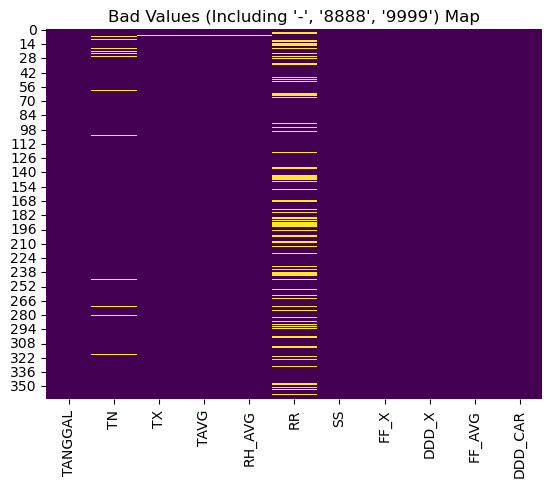

In [58]:
sns.heatmap(bad_mask, cbar=False, cmap='viridis')
plt.title("Bad Values (Including '-', '8888', '9999') Map")
plt.show()

Handle Missing Value / Bad Value

In [59]:
# Handle Special feature if make average or something
# custom_replacements = {
#     'TN': 1,
#     'RR': np.nan,
# }
df.replace(bad_values, np.nan, inplace=True)

Convert to datetime and floats

In [60]:
df['TANGGAL'] = pd.to_datetime(df['TANGGAL'], dayfirst=True)
numeric_columns = ['TN', 'TX', 'TAVG', 'RH_AVG', 'RR', 'SS', 'FF_X', 'DDD_X', 'FF_AVG']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')
df

,TANGGAL,TN,TX,TAVG,RH_AVG,RR,SS,FF_X,DDD_X,FF_AVG,DDD_CAR
0,2023-01-01,20.0,26.8,22.6,83.0,5.2,0.2,4,220,1,W
1,2023-01-02,19.4,28.8,23.8,75.0,0.0,3.3,4,180,2,W
2,2023-01-03,21.4,27.6,23.5,77.0,0.0,6.1,3,20,2,SW
3,2023-01-04,21.0,28.8,23.5,76.0,NaN,4.8,6,300,2,SW
4,2023-01-05,20.6,29.4,23.7,79.0,0.2,5.0,5,260,2,S
...,...,...,...,...,...,...,...,...,...,...,...
358,2023-12-27,20.6,29.8,24.3,82.0,NaN,3.3,2,237,0,C
359,2023-12-28,20.8,29.6,24.9,79.0,1.7,3.5,2,20,0,C
360,2023-12-29,21.8,30.4,24.9,83.0,0.7,4.4,12,240,1,C
361,2023-12-30,22.0,29.2,24.0,88.0,53.0,5.9,2,100,0,C


In [64]:
print(df[df.isin(bad_values).any(axis=1)])

Empty DataFrame
Columns: [TANGGAL, TN, TX, TAVG, RH_AVG, RR, SS, FF_X, DDD_X, FF_AVG, DDD_CAR]
Index: []
